In [ ]:
#Anel Vásquez anel.vasquez@utp.ac.pa
#Vladimir Saenz vladimir.saenz@utp.ac.pa
#Hugo Zamorano hugo.zamorano@utp.ac.pa

In [49]:
import psycopg2
import pandas as pd

from datetime import date
import os

import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon
import folium

import ipywidgets as widgets

In [79]:
conn = psycopg2.connect(host = "ec2-18-235-4-83.compute-1.amazonaws.com", dbname = "ddkspvhu6eifu0", user = "udxqmonmankkgv", password = "4ab607087038ffcf0478ca0c11b86a453d8e0470a34bfed09b1bc223de7ab72a", port = "5432")

In [80]:
cur = conn.cursor()

In [81]:
sql = "select * from tb_covid"
data = pd.read_sql_query(sql,conn)

In [82]:
data = pd.DataFrame(data)
data = data.drop(index=0)

In [83]:
data["datecovid"] = data["datecovid"].map(lambda x: date.fromisoformat(x))

In [84]:
data["weekday"] = data["datecovid"].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data["weekday"] = [w_list[idx] for idx in data["weekday"]]

In [85]:
def cut_long(point):
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [86]:
data["long"] = data["centroid"].map(cut_long)
data["lat"] = data["centroid"].map(cut_lat)

In [87]:
data_aux = data[~data[["airportname"]].duplicated()].reset_index(drop=True)

In [88]:
data_frame_geometry = data_aux[['airportname', 'city', 'sate','iso_3166_2', 'country', 'long', 'lat']]

In [89]:
def visualize_airport_map(df,  zoom):
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
        
    for i in range(0,len(df)):
        folium.Marker(location=[df["lat"][i],df["long"][i]],icon=folium.Icon(icon_color='white',icon ='plane')).add_to(m)
        
    return m

In [90]:
mapa_ap = visualize_airport_map(data_aux,2)

# Mapa de los Aereopuertos 

In [91]:
mapa_ap

Como la mayoria de los datos se encuentran en america, vamos a ver cuantos hay en total con un grafico circular

Text(0.5, 1.0, 'Registro por cada Pais')

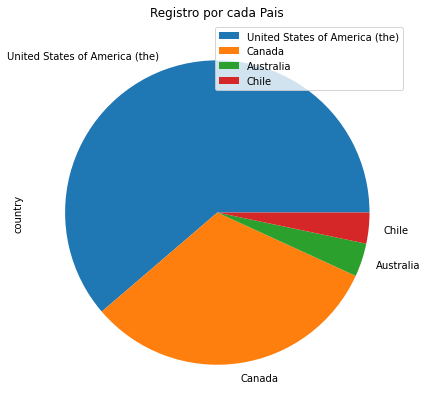

In [92]:
df_Country_count = pd.DataFrame(data["country"].value_counts())
#df_Country_count
g = df_Country_count.plot.pie(y='country', figsize=(7, 7))
g.set_title("Registro por cada Pais")

Esto muestra que hay alrededor de 250 puntos de datos en cada aeropuerto, excepto en el Aeropuerto Internacional de Santiago y el Aeropuerto Internacional de Edmonton.

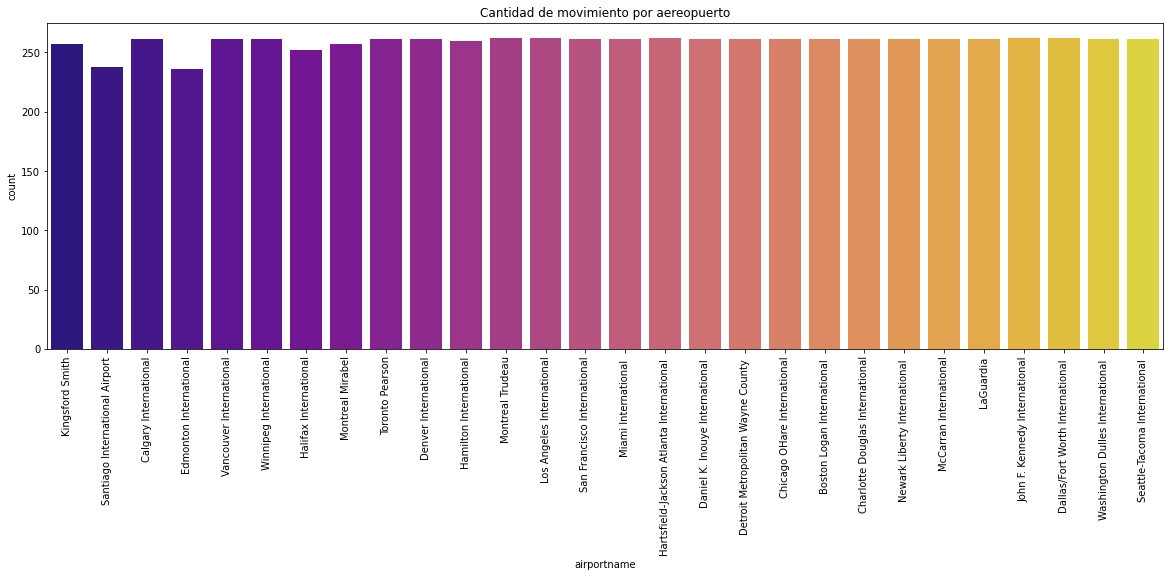

In [93]:
plt.figure(figsize=(20,6))
fig1 = sns.countplot(x = 'airportname', data = data , palette='plasma')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
fig1.set_title("Cantidad de movimiento por aereopuerto")
plt.show();

Esto muestra que todas las ciudades tienen recuentos más o menos iguales en los datos, excepto Nueva York. La razón más probable sería que tiene más aeropuertos. 

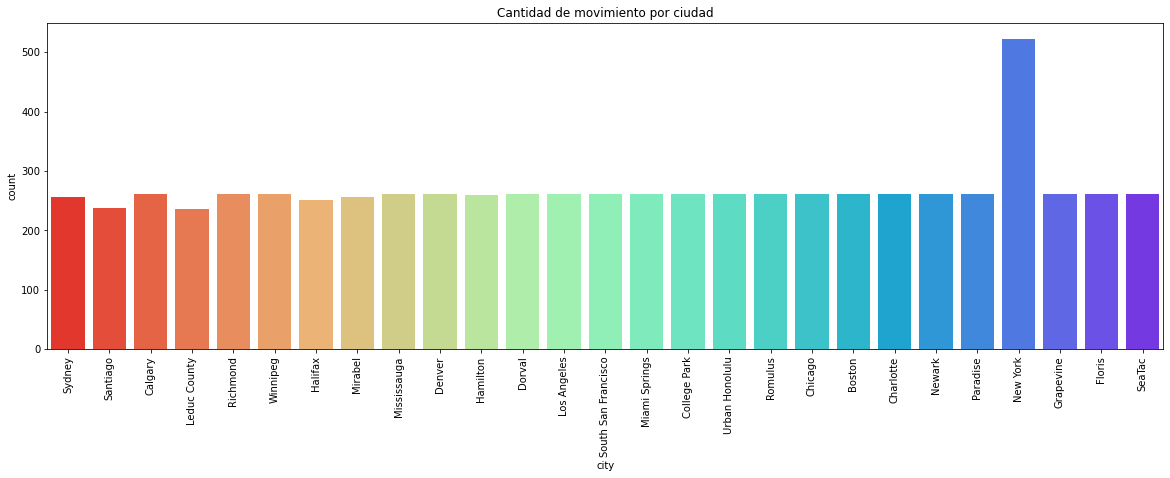

In [94]:
plt.figure(figsize=(20,6))
fig2 = sns.countplot(x = 'city', data = data , palette='rainbow_r')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
fig2.set_title("Cantidad de movimiento por ciudad")
plt.show();

Aquí, todos los estados tienen el mismo recuento de datos, excepto Alberta, Quebec, California y Nueva York. Una vez más, la razón más probable debe ser el número de aeropuertos.

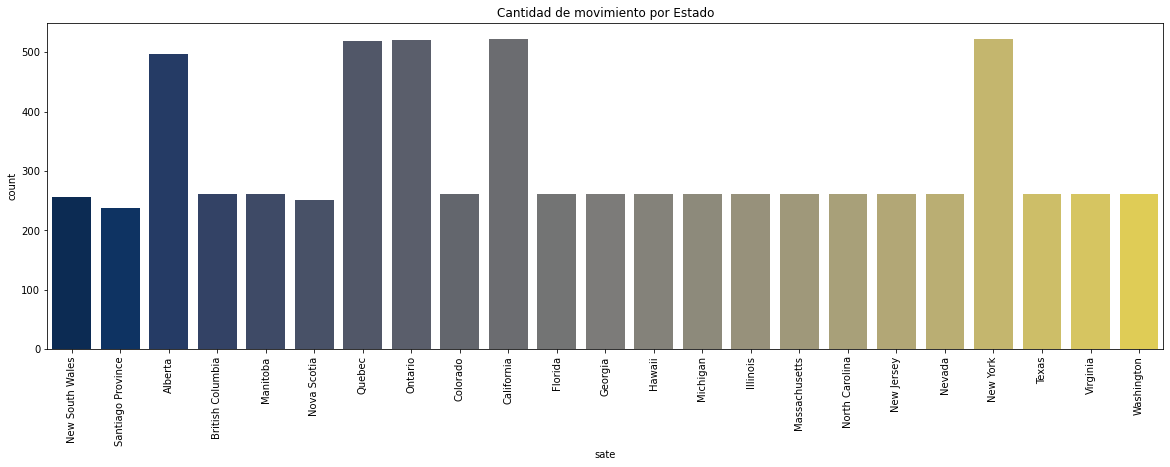

In [95]:
plt.figure(figsize=(20,6))
fig3 = sns.countplot(x = 'sate', data = data , palette='cividis')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90)
fig3.set_title("Cantidad de movimiento por Estado")
plt.show();

Los puntos de datos máximos son para EE. UU. Seguido de Canadá. Esto se debe a que el número de aeropuertos en EE. UU. Y Canadá es probablemente mayor que el de Australia y Chile. 

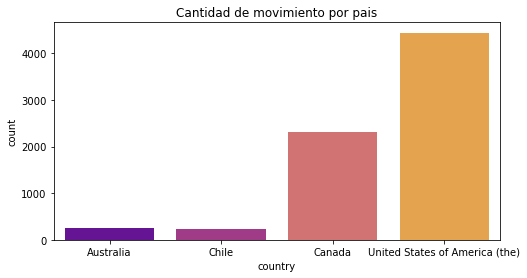

In [96]:
plt.figure(figsize=(8,4))
fig4 = sns.countplot(x = 'country', data = data , palette='plasma')
fig4.set_xticklabels(fig4.get_xticklabels())
fig4.set_title("Cantidad de movimiento por pais")
plt.show();

In [97]:
data.groupby("country")[['sate','city','airportname']].nunique()

,sate,city,airportname
country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


# Distribución del porcentaje de referencia

In [98]:
data["percentofbaseline"]=pd.DataFrame(data["percentofbaseline"], dtype='int')

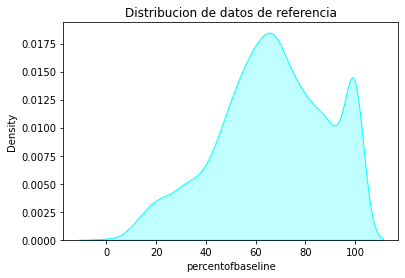

In [99]:
sns.kdeplot(data['percentofbaseline'],shade=True, color="cyan")
plt.title("Distribucion de datos de referencia")
plt.show();

# Distribucion para Chile 

In [100]:
data_chile = data[data['country']=='Chile']

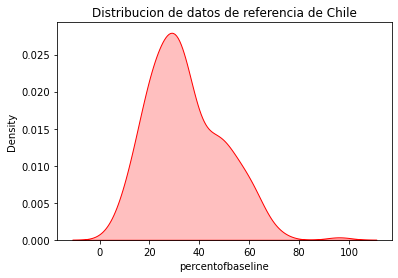

In [101]:
sns.kdeplot(data_chile['percentofbaseline'],shade=True, color="red")
plt.title("Distribucion de datos de referencia de Chile")
plt.show();

# Distribucion para USA

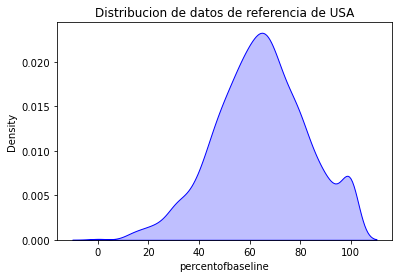

In [102]:
data_USA = data[data['country']=='United States of America (the)']
sns.kdeplot(data_USA['percentofbaseline'],shade=True, color="blue")
plt.title("Distribucion de datos de referencia de USA")
plt.show();

# Distribucion para Canada

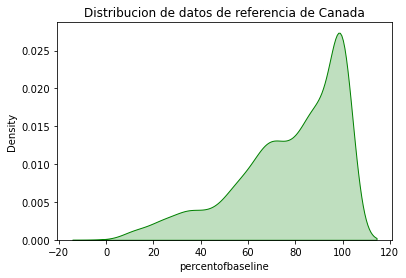

In [103]:
data_Canada = data[data['country']=='Canada']
sns.kdeplot(data_Canada['percentofbaseline'],shade=True, color="green")
plt.title("Distribucion de datos de referencia de Canada")
plt.show();

# Distribucion para Australia

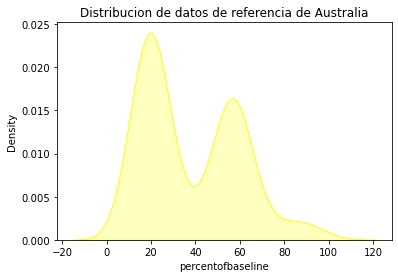

In [104]:
data_Australia = data[data['country']=='Australia']
sns.kdeplot(data_Australia['percentofbaseline'],shade=True, color="yellow")
plt.title("Distribucion de datos de referencia de Australia")
plt.show();

# Movimiento durante los meses

Text(0.5, 1.0, 'Registro por cada mes')

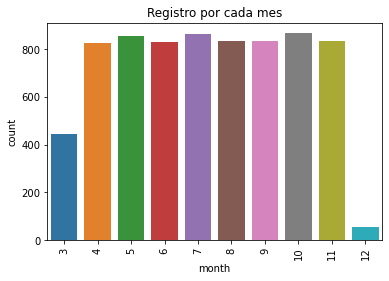

In [105]:
df_month_count = pd.DataFrame(data["datecovid"].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns={"datecovid":"count", "index":"month"})
g = sns.barplot(data=df_month_count.reset_index(), y="count", x="month")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Registro por cada mes")

# Movimiento durante las semanas

Text(0.5, 1.0, 'Registo por semana')

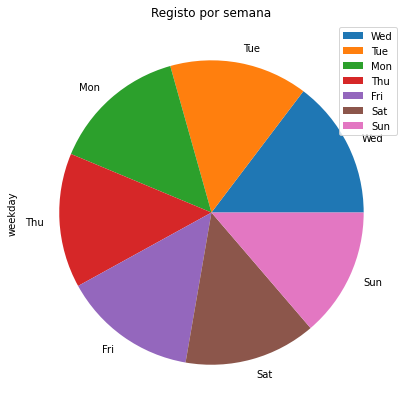

In [106]:
df_weekday_count = pd.DataFrame(data["weekday"].value_counts())
g = df_weekday_count.plot.pie(y='weekday', figsize=(7, 7))
g.set_title("Registo por semana")